### I Built The K Means Algorithm From Scratch
- It wasn't terribly difficult, either.
- It's a simple algorithm, so this wasn't unexpected. I build it to work in an arbitrary number of dimensions, I will show it working in 2.
- Values of $k$ will vary as well.

In [1]:
from kmlk import kmlk, clusters

import matplotlib.pyplot as plt
import numpy as np

### Imports
- `kmlk` is my module for the algorithm
- `matplotlib.pyplot` is used for plotting
- `numpy` is used for some calculations

In [2]:

dataset_1, _ = clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0)
dataset_1_var, _ = clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0.3)

dataset_2, _ = clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0)
dataset_2_var, _ = clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0.3)

dataset_3, _ = clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0)
dataset_3_var, _ = clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0.3)

dataset_4, _ = clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0)
dataset_4_var, _ = clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0.3)

### Datasets
- Same code that is used in the notebooks where I use scikit-learn.

In [3]:
def train_and_plot(model: kmlk.KM, k: int, dataset: np.ndarray) -> None:
    model.train(dataset)

    labels_arr = model.predict(dataset)

    clusters = [[] for i in range(k)]
    for i in range(len(dataset)):
        clusters[int(labels_arr[i])].append(dataset[i])

    colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown']
    ax = plt.gca()

    lim1 = abs(np.max(dataset))+10
    lim2 = abs(np.min(dataset))+10
    if (lim1 > lim2):
        ax.set_xlim(-lim1, lim1)
        ax.set_ylim(-lim1, lim1)
    else:
        ax.set_xlim(-lim2, lim2)
        ax.set_ylim(-lim2, lim2)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    for i in range(len(clusters)):
        xdata = []
        ydata = []

        for d in clusters[i]:
            xdata.append(d[0])
            ydata.append(d[1])

        ax.scatter(xdata, ydata, c=colors[i])

    ax.legend([f"Cluster {i+1}" for i in range(k)])
    
    plt.show()

### Training
- Also the same code as scikit-learn

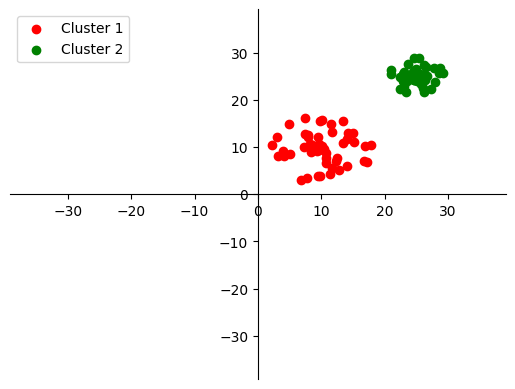

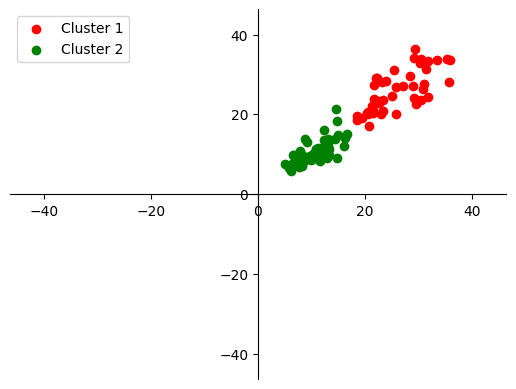

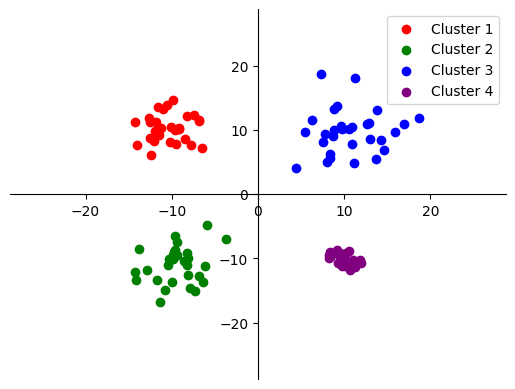

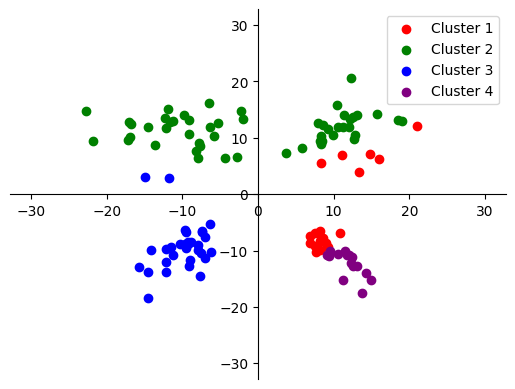

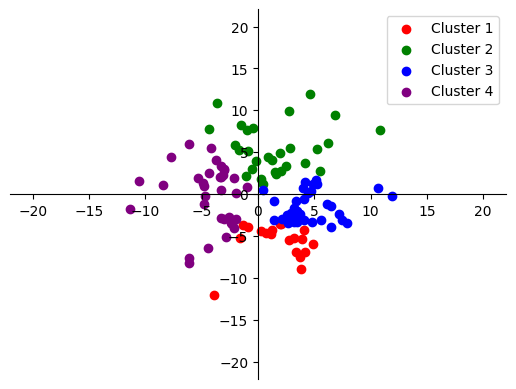

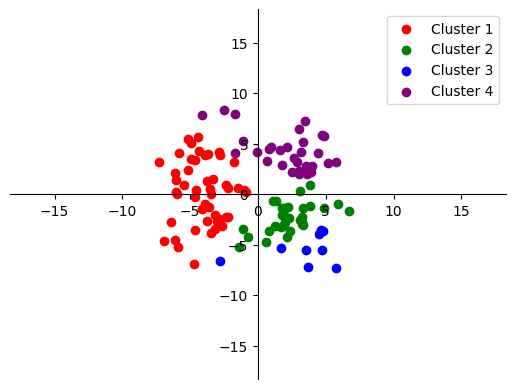

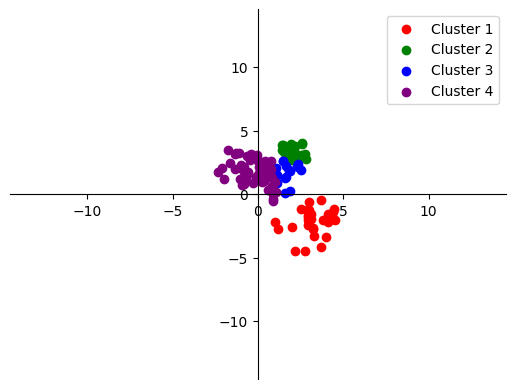

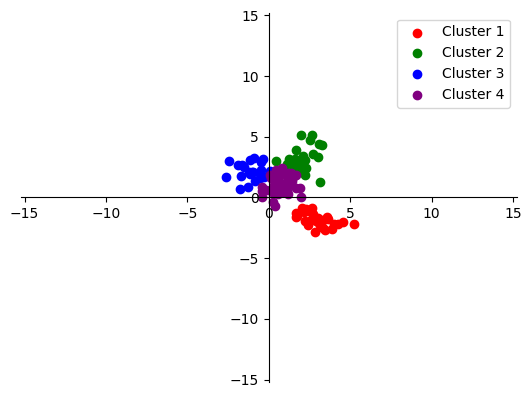

In [4]:
train_and_plot(kmlk.KM(2), 2, dataset_1)
train_and_plot(kmlk.KM(2), 2, dataset_1_var)

train_and_plot(kmlk.KM(4), 4, dataset_2)
train_and_plot(kmlk.KM(4), 4, dataset_2_var)

train_and_plot(kmlk.KM(4), 4, dataset_3)
train_and_plot(kmlk.KM(4), 4, dataset_3_var)

train_and_plot(kmlk.KM(4), 4, dataset_4)
train_and_plot(kmlk.KM(4), 4, dataset_4_var)